Reading file and choosing sample of 8000 messenges to analyze(bigger dataset doesn't give more accuricy but only make calculation longer)

In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv("merged_file.txt",sep='\t')
data = data.sample(n=8000)
#data = data[['analysis','message']]
data.set_index('analysis')
data

,analysis,message
582060,0,( - stocksolution 2005 @ yahoo . com - )Subjec...
268051,1,this issue resolved .
12985,1,julie meyers
696925,0,commission baltic renewable energy centre ( ec...
349300,1,start date : 1 / 10 / 02 ; hourahead hour : 20...
...,...,...
613072,0,will become much more effective . here is the ...
302031,1,midwest origination
700997,0,message - id : 200504222357 . j 3 mnvjdo 7950 ...
539488,0,"historical fact and may be "" forward looking s..."


Dropping N/A values and ensuring that out data is clean 

In [4]:
data = data.dropna()
missing_data = data.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data == 0].index).sort_values(ascending=False)
missing_data

Series([], dtype: int64)

Running main application with interface

In [5]:
import tkinter as tk
from tkinter import font
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

class SpamDetector(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.geometry("500x300") 
        self.title("Spam Detector")
        self.configure(bg='#b2d8b2')

        self.label = tk.Label(self, text="Enter a message:", bg='#b2d8b2')
        self.label.place(x=50, y=50)

        self.entry = tk.Entry(self, width=50, borderwidth=2, relief="groove")
        self.entry.place(x=150, y=50,height=100)

        self.algo_label = tk.Label(self, text="Choose algorithm:", bg='#b2d8b2')
        self.algo_label.place(x=50, y=150)

        self.algo_var = tk.StringVar()
        self.algo_var.set("SVM") # default value
        self.algo_menu = tk.OptionMenu(self, self.algo_var, "SVM", "Naive Bayes", "Logistic Regression")
        self.algo_menu.config(width=15)
        self.algo_menu.place(x=150, y=150)

        self.button = tk.Button(self, text="Check", command=self.classify_message)
        self.button.place(x=200, y=200)

        self.result_label = tk.Label(self, text="",bg="#b2d8b2")
        self.result_label.place(x=200, y=250)

        self.tfidf = TfidfVectorizer()
        self.clf = svm.SVC(kernel='linear')
        self.clfs = {"SVM": self.clf, "Naive Bayes": MultinomialNB(), "Logistic Regression": LogisticRegression()}
        
        self.train_data = []
        self.train_labels = []

        
    def train(self, data, labels):
        self.train_data = data
        self.train_labels = labels
        self.tfidf.fit(data)
        for algo, clf in self.clfs.items():
            clf.fit(self.tfidf.transform(data), labels)
            
    def classify_message(self):
        messages = [self.entry.get()]
        messages_tfidf = self.tfidf.transform(messages)
        algo = self.algo_var.get()
        clf = self.clfs[algo]
        prediction = clf.predict(messages_tfidf)
        if prediction[0] == 0:
            result = "Spam"
        else:
            result = "Not Spam"
        self.result_label.config(text=f"Result: {result}")
       
    def run(self):
        self.mainloop()

if __name__ == '__main__':
    detector = SpamDetector()
    detector.train(data['message'], data['analysis'])
    detector.run()

ploting accuracy for every algorithm

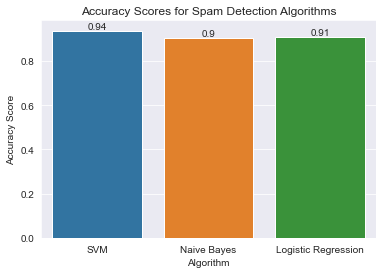

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# initialize the detector and train the data
detector = SpamDetector()
detector.train(data['message'], data['analysis'])

# create an empty dictionary to store the accuracy scores for each algorithm
accuracy_scores = {}

# loop over each algorithm and calculate the accuracy score
for algo, clf in detector.clfs.items():
    clf.fit(detector.tfidf.transform(detector.train_data), detector.train_labels)
    predictions = clf.predict(detector.tfidf.transform(detector.train_data))
    acc_score = accuracy_score(detector.train_labels, predictions)
    accuracy_scores[algo] = acc_score

# create a bar plot of the accuracy scores
sns.set_style('darkgrid')
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Accuracy Scores for Spam Detection Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

# add annotations to the bars
for i, v in enumerate(list(accuracy_scores.values())):
    plt.annotate(str(round(v, 2)), xy=(i, v), ha='center', va='bottom')

plt.show()

